#### 확률적 경사 하강법

- 훈련 세트에서 샘플을 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘
- 데이터가 매우 크거나 실시간 학습이 필요한 경우 점진적으로 학습하는 방법
- 미니배치 경사하강법 : 샘플을 하나씩 사용하지 않고 여러 개 사용
- 배치 경사 하강법 : 한 번에 전체 샘플 사용

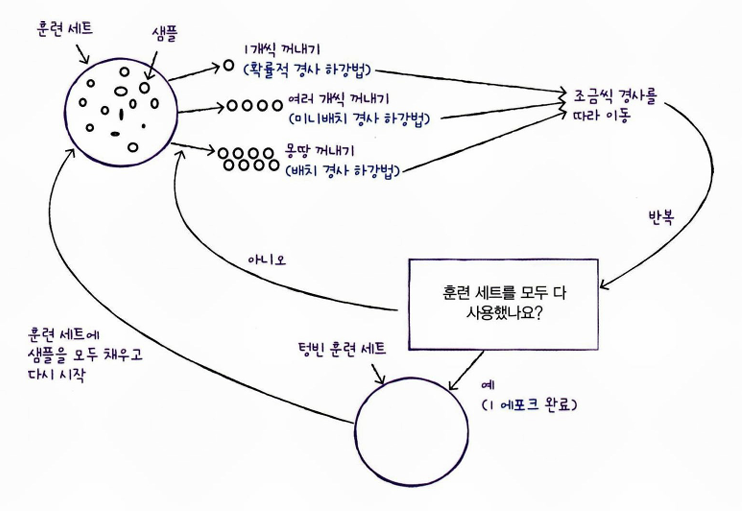


손실 함수
- 확률적 경사 하강법이 최적화할 대상
- 이진 분류에는 로지스틱 회귀 (이진 크로스엔트로피) 손실 함수 사용
- 다중 분류에는 크로스엔트로피 손실 함수 사용
- 회귀 문제에는 평균 제곱 오차 손실 함수 사용

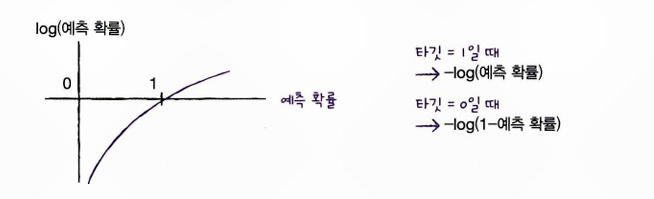

에포크
- 확률적 경사 하강법에서 전체 샘플을 모두 사용하는 한 번 반복을 의미
- 일반적으로 경사 하강법 알고리즘은 수십에서 수백 번의 에포크 반복

#### SGDClassifier

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
# 입력 및 타깃 데이터
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_target = fish['Species']

In [ ]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
# 표준화 - 특성 값 스케일 맞추기, 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스
from sklearn.linear_model import SGDClassifier

In [ ]:
# loss : 손실 함수의 종류 지정, log_loss : 로지스틱 손실 함수
# max_iter : 수행할 에포크 횟수 (반복 횟수)
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
# 확률적 경사 하강법은 점진적 학습이 가능하므로 객체를 다시 만들지 않고 추가 훈련 가능
sc.partial_fit(train_scaled, train_target) # 1에포크씩 이어서 훈련

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


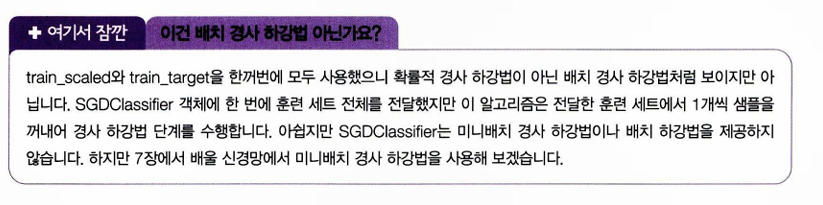

##### 에포크와 과대/과소적합

- 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합/과대적합 나타날 수 있음
- 에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습한 과소적합
- 횟수가 많으면 훈련 세트를 완전히 학습해 과대적합이 될 수 있음
- 조기 종료 : 과대적합이 시작하기 전에 훈련을 멈추는 것

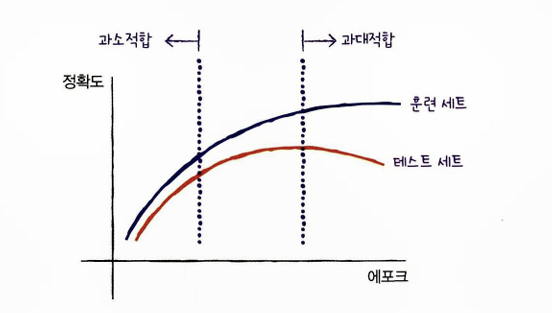

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
# 전체 클래스의 레이블을 partial_fit() 메소드에 전달하기 위해 생성한 생선 목록
classes = np.unique(train_target)

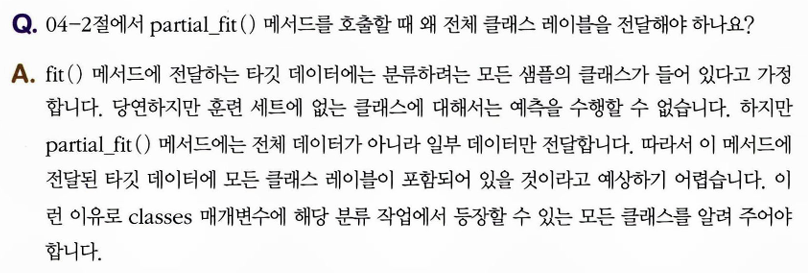

In [ ]:
# 300번의 에포크 동안 훈련 반복
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

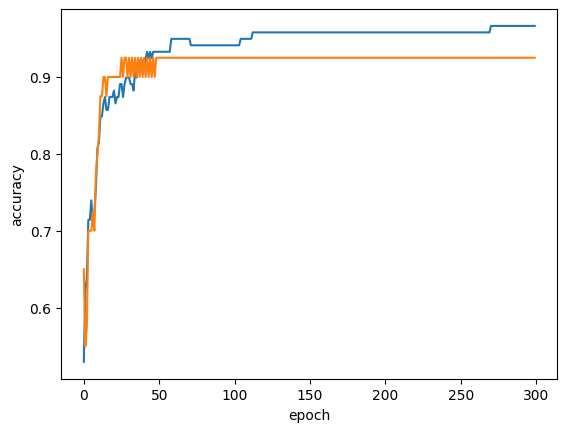

In [ ]:
# 300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수 그래프
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 반복 횟수를 100으로 하고 모델 다시 훈련
# tol=None : 자동으로 멈추지 않고 max_iter 만큼 무조건 반복 (tol : 향상될 성능의 최솟값)
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
# loss 매개변수의 기본값 : 'hinge' (힌지 손실)
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
